# Exploring Movie Data

Exploring and visualizing movie data scraped from Box Office Mojo. Make sure to format your plots properly with axis labels and graph titles at the very least.

-------

### Data Prep
 
Load the dataset and explore its contents, columns and types. Convert any date columns from string to Python's datetime.

In [24]:
import pandas as pd
data=pd.read_csv('2013-16_movies.csv')

In [28]:
data.head()
len(data)

400

In [5]:
data.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [10]:
data["Rating"].value_counts()

PG-13    194
R        132
PG        71
G          3
Name: Rating, dtype: int64

In [25]:
from datetime import datetime
format="%Y-%m-%d %H:%M:%S"

data["ReleaseDate"] = data["ReleaseDate"].apply(lambda x:datetime.strptime(x, format))
data.dtypes


Title                         object
Budget                       float64
DomesticTotalGross             int64
Director                      object
Rating                        object
Runtime                        int64
ReleaseDate           datetime64[ns]
dtype: object

In [26]:
data.describe()

/Users/adribadri/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Budget,DomesticTotalGross,Runtime
count,3.470000e+02,4.000000e+02,400.000000
mean,6.934669e+07,1.008192e+08,112.390000
std,5.935362e+07,1.014442e+08,17.253612
min,1.000000e+05,2.106712e+07,75.000000
25%,NaN,4.008397e+07,100.000000
50%,NaN,6.446666e+07,111.000000
75%,NaN,1.204759e+08,123.000000
max,2.500000e+08,9.366622e+08,180.000000


### Exercise 1 
 
Plot the Domestic Total Gross by Release Date. Try a scatterplot and a line plot. In what scale are the numbers on the Y axis?

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

data.sort("ReleaseDate", inplace=True)
data.head(10)

/Users/adribadri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25
52,Warm Bodies,35000000.0,66380662,Jonathan Levine,PG-13,97,2013-02-01
87,Side Effects (2013),NaN,32172757,Steven Soderbergh,R,106,2013-02-08
19,Identity Thief,35000000.0,134506920,Seth Gordon,R,111,2013-02-08
47,Safe Haven,28000000.0,71349120,Lasse Hallstrom,PG-13,115,2013-02-14
51,A Good Day to Die Hard,92000000.0,67349198,John Moore,R,97,2013-02-14


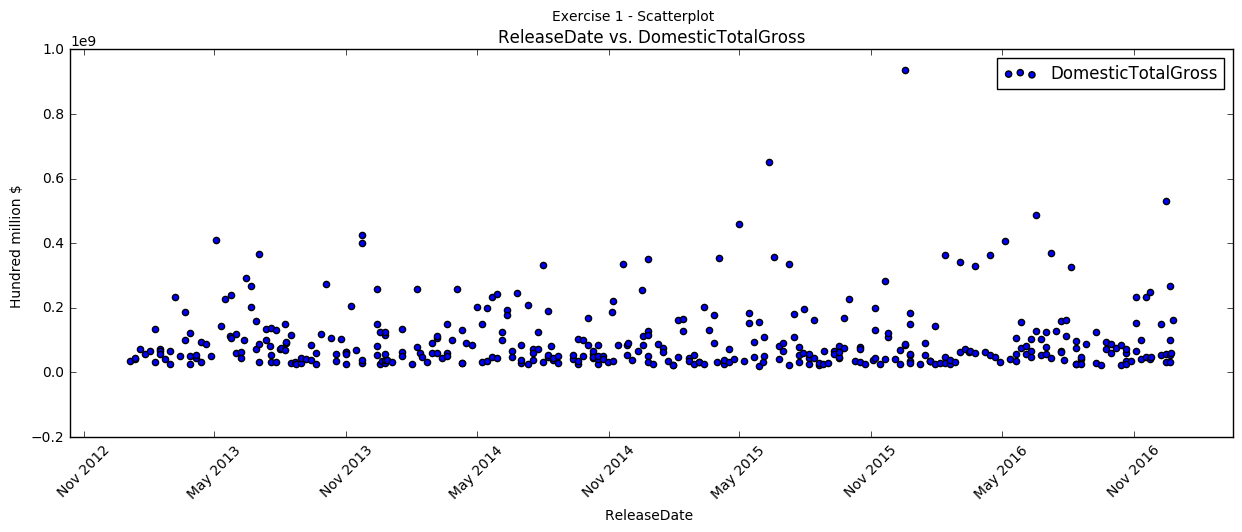

In [121]:
times = [d.to_pydatetime() for d in data["ReleaseDate"]]
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(x=times, y=data["DomesticTotalGross"], marker='o')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel("Hundred million $ ")
plt.xlabel("ReleaseDate ")
plt.title("ReleaseDate vs. DomesticTotalGross")
plt.suptitle("Exercise 1 - Scatterplot")
plt.show()

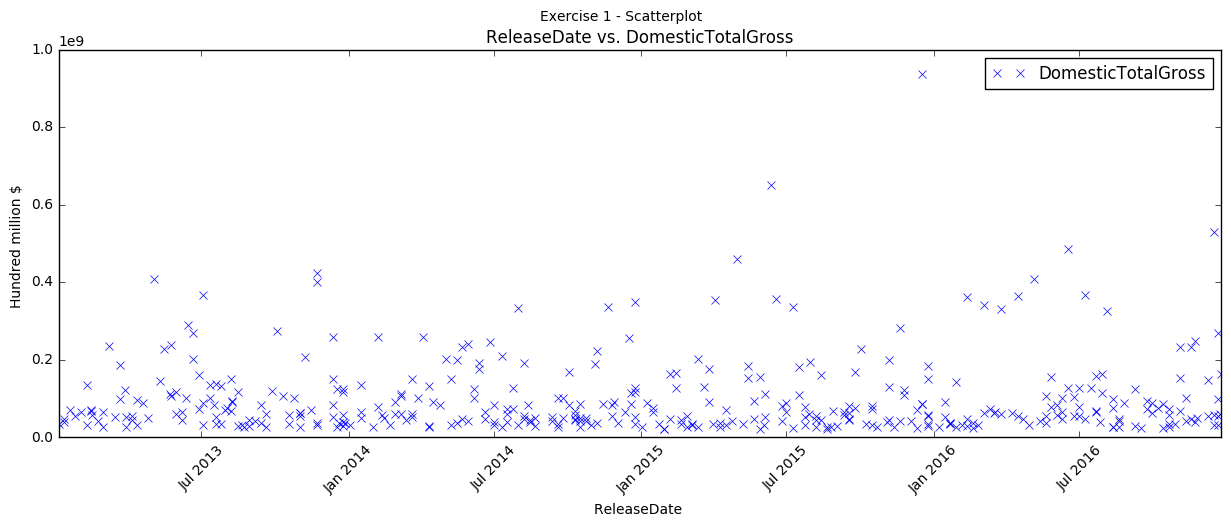

In [122]:
fig=plt.figure(figsize=(15,5))
plt.plot( data["ReleaseDate"], data["DomesticTotalGross"], 'bx')
plt.xticks(rotation=45)
plt.legend()
plt.ylabel("Hundred million $ ")
plt.xlabel("ReleaseDate ")
plt.title("ReleaseDate vs. DomesticTotalGross")
plt.suptitle("Exercise 1 - Scatterplot")
plt.show()

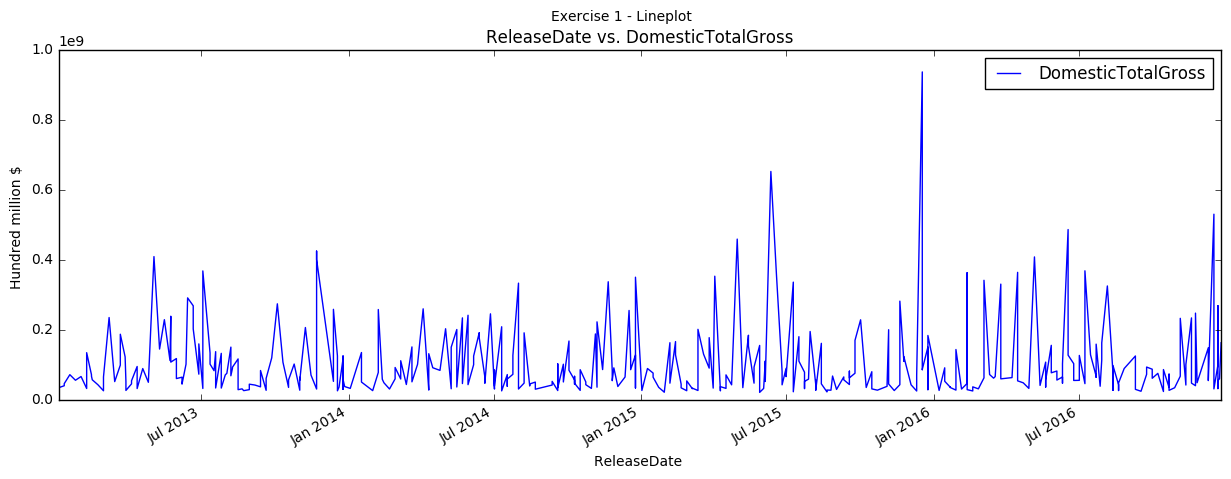

In [123]:
data_plot=data[["DomesticTotalGross", "ReleaseDate"]]
data_plot.set_index("ReleaseDate", inplace=True)
fig=plt.figure(figsize=(15,5))
ax=plt.gca()
data_plot.plot(kind='line', ax=ax) 
plt.ylabel("Hundred million $ ")
plt.xlabel("ReleaseDate ")
plt.title("ReleaseDate vs. DomesticTotalGross")
plt.suptitle("Exercise 1 - Lineplot")
plt.show()


In [ ]:
# the scale in y axis is 100 million dollar

### Exercise 2

Plot the Domestic Total Gross by Runtime. Try a scatterplot and a line plot. What are the benefits and liabilities of each type of plot in this case?

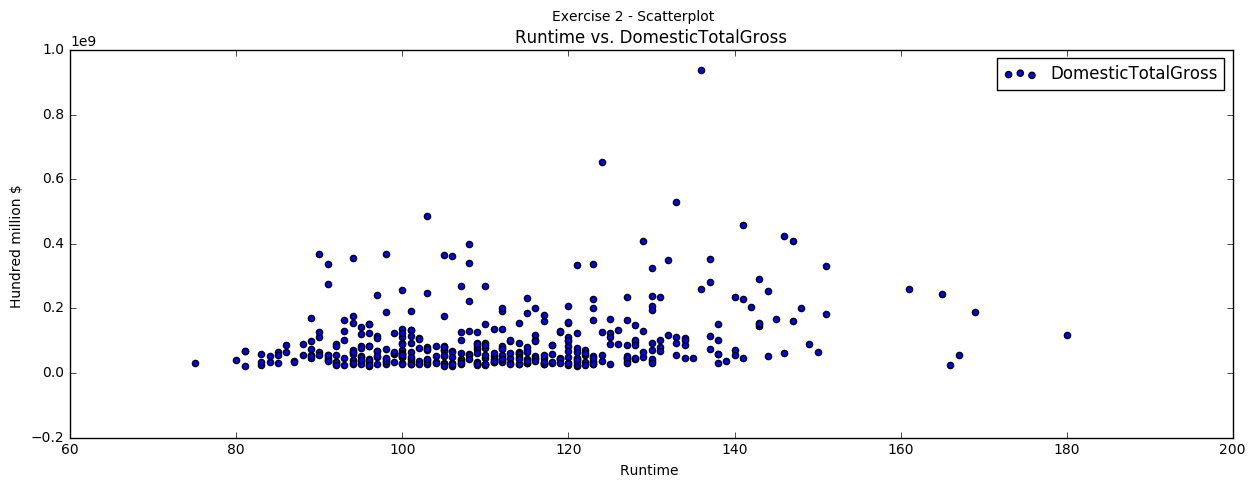

In [124]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(x=data["Runtime"], y=data["DomesticTotalGross"], marker='o')
plt.legend()
plt.ylabel("Hundred million $ ")
plt.xlabel("Runtime ")
plt.title("Runtime vs. DomesticTotalGross")
plt.suptitle("Exercise 2 - Scatterplot")
plt.show()

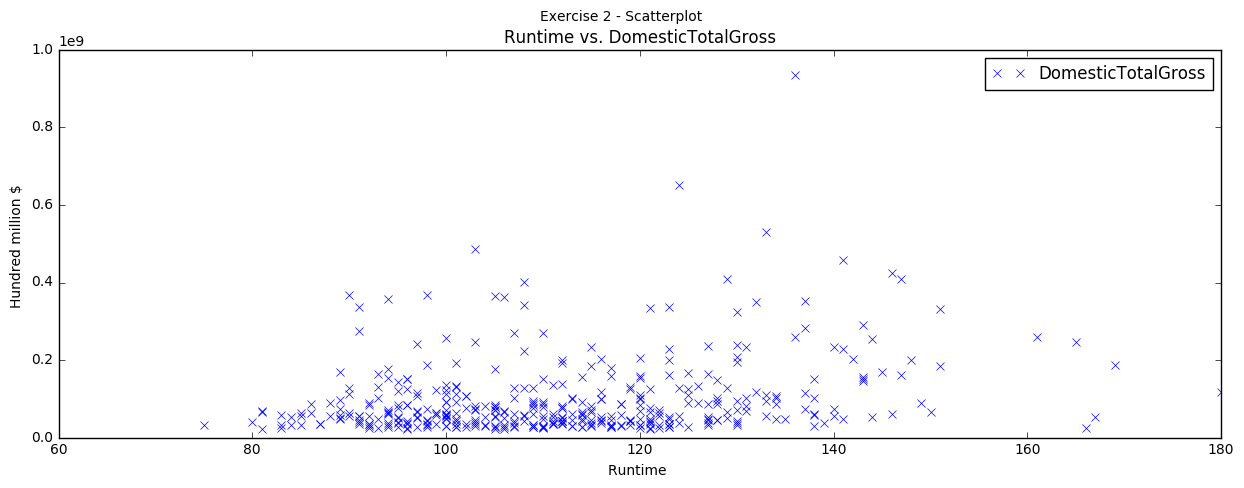

In [125]:
f=plt.figure(figsize=(15,5))
plt.plot(data["Runtime"], data["DomesticTotalGross"], 'bx')
plt.legend()
plt.ylabel("Hundred million $ ")
plt.xlabel("Runtime ")
plt.title("Runtime vs. DomesticTotalGross")
plt.suptitle("Exercise 2 - Scatterplot")
plt.show()

/Users/adribadri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


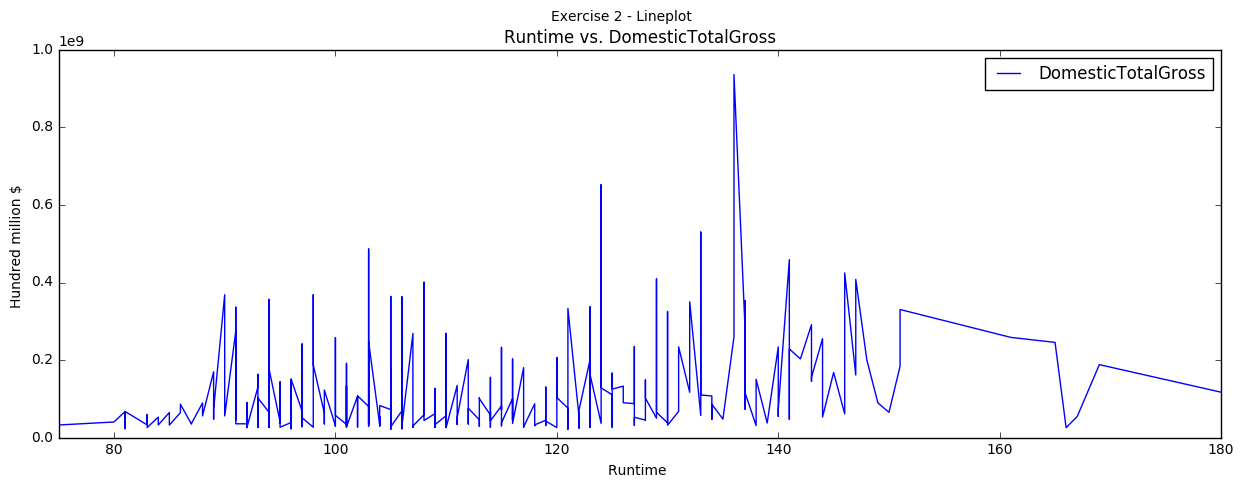

In [126]:
data_plot2=data[["Runtime","DomesticTotalGross"]]
data_plot2.sort_values(by="Runtime", inplace=True)
fig=plt.figure(figsize=(15,5))
ax=plt.gca()
data_plot2.plot(x="Runtime",y="DomesticTotalGross", ax=ax)
plt.legend()
plt.ylabel("Hundred million $ ")
plt.xlabel("Runtime ")
plt.title("Runtime vs. DomesticTotalGross")
plt.suptitle("Exercise 2 - Lineplot")
plt.show()

### Exercise 3

The Motion Picture Association of America (MPAA) rating system comprises of G (general audiences: all ages admitted), PG (parental guidance suggested: may not be suitable for children), PG-13 (parents stronly cautioned: may be inappropriate for children under 13), and R (restricted: under 17 requires accompanying parent or adult guardian). Find the average Runtime and Domestic Total Gross at each Rating Level. Plot both by Rating. Do you see any pattern in the data?

In [129]:
rating_aggr=data.groupby('Rating')[["Runtime","DomesticTotalGross"]].mean()
rating_aggr

,Runtime,DomesticTotalGross
Rating,,
G,100.333333,1.767365e+08
PG,102.605634,1.315539e+08
PG-13,116.551546,1.098403e+08
R,111.810606,6.930405e+07


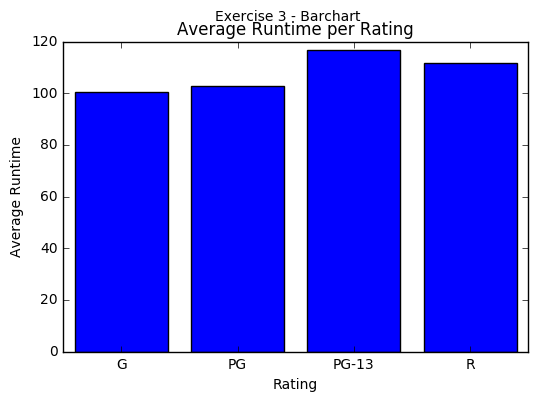

In [149]:
import numpy as np
x=rating_aggr.index
ind = np.arange(4)
fig, ax = plt.subplots()
ax.bar(ind, rating_aggr["Runtime"], align='center')
plt.xticks(ind, x)
plt.ylabel("Average Runtime")
plt.xlabel("Rating")
plt.title("Average Runtime per Rating")
plt.suptitle("Exercise 3 - Barchart")

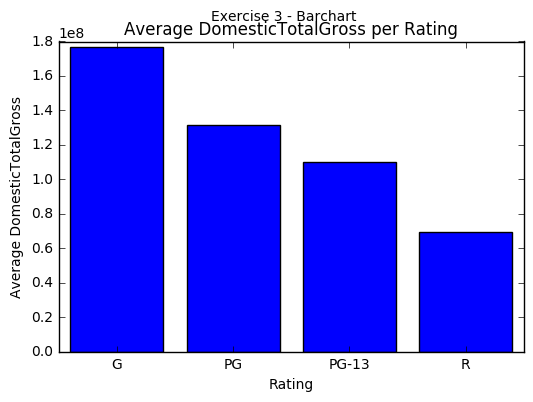

In [150]:
fig, ax = plt.subplots()
ax.bar(ind, rating_aggr["DomesticTotalGross"], align='center')
plt.xticks(ind, x)
plt.ylabel("Average DomesticTotalGross")
plt.xlabel("Rating")
plt.title("Average DomesticTotalGross per Rating")
plt.suptitle("Exercise 3 - Barchart")

### Exercise 4

Plot the Domestic Total Gross by the Release Date. Segment by Rating - that is, have all 4 groups on the same plot. Can you spot anything out of the ordinary? Now make 4 separate plots (one for each Rating) but part of the same matplotlib figure. What are the benefits and liabilities of each approach?

In [176]:
data['Rating'].value_counts()

PG-13    194
R        132
PG        71
G          3
Name: Rating, dtype: int64

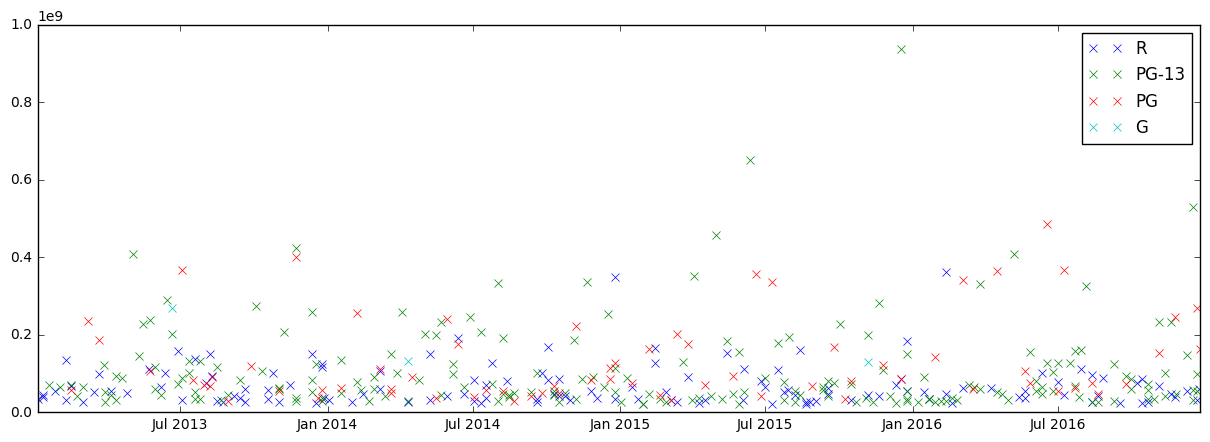

In [182]:
f=plt.figure(figsize=(15,5))
ax = f.add_subplot()

ratings=data['Rating'].unique()

for r in ratings:
    data_r=data[data['Rating']==r]
    plt.plot(data_r['ReleaseDate'], data_r['DomesticTotalGross'], 'x', label=r)
    plt.legend(loc='best')
plt.show()       
#data.groupby('Rating')[['ReleaseDate','DomesticTotalGross']].plot(kind='line', ax=ax)

/Users/adribadri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


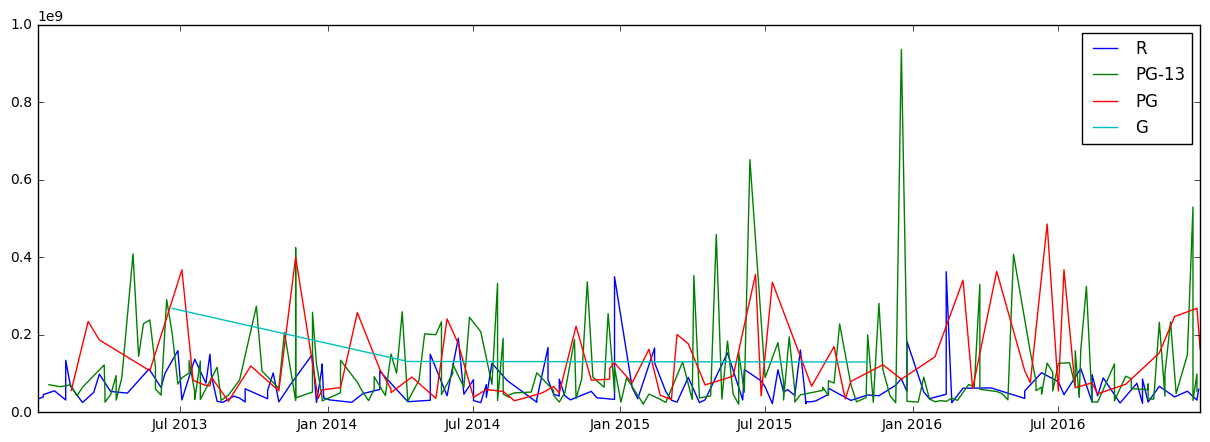

In [180]:
f=plt.figure(figsize=(15,5))
ax = f.add_subplot()

ratings=data['Rating'].unique()

for r in ratings:
    data_r=data[data['Rating']==r].sort('ReleaseDate')
    plt.plot(data_r['ReleaseDate'], data_r['DomesticTotalGross'], label=r)
    plt.legend()
plt.show()   

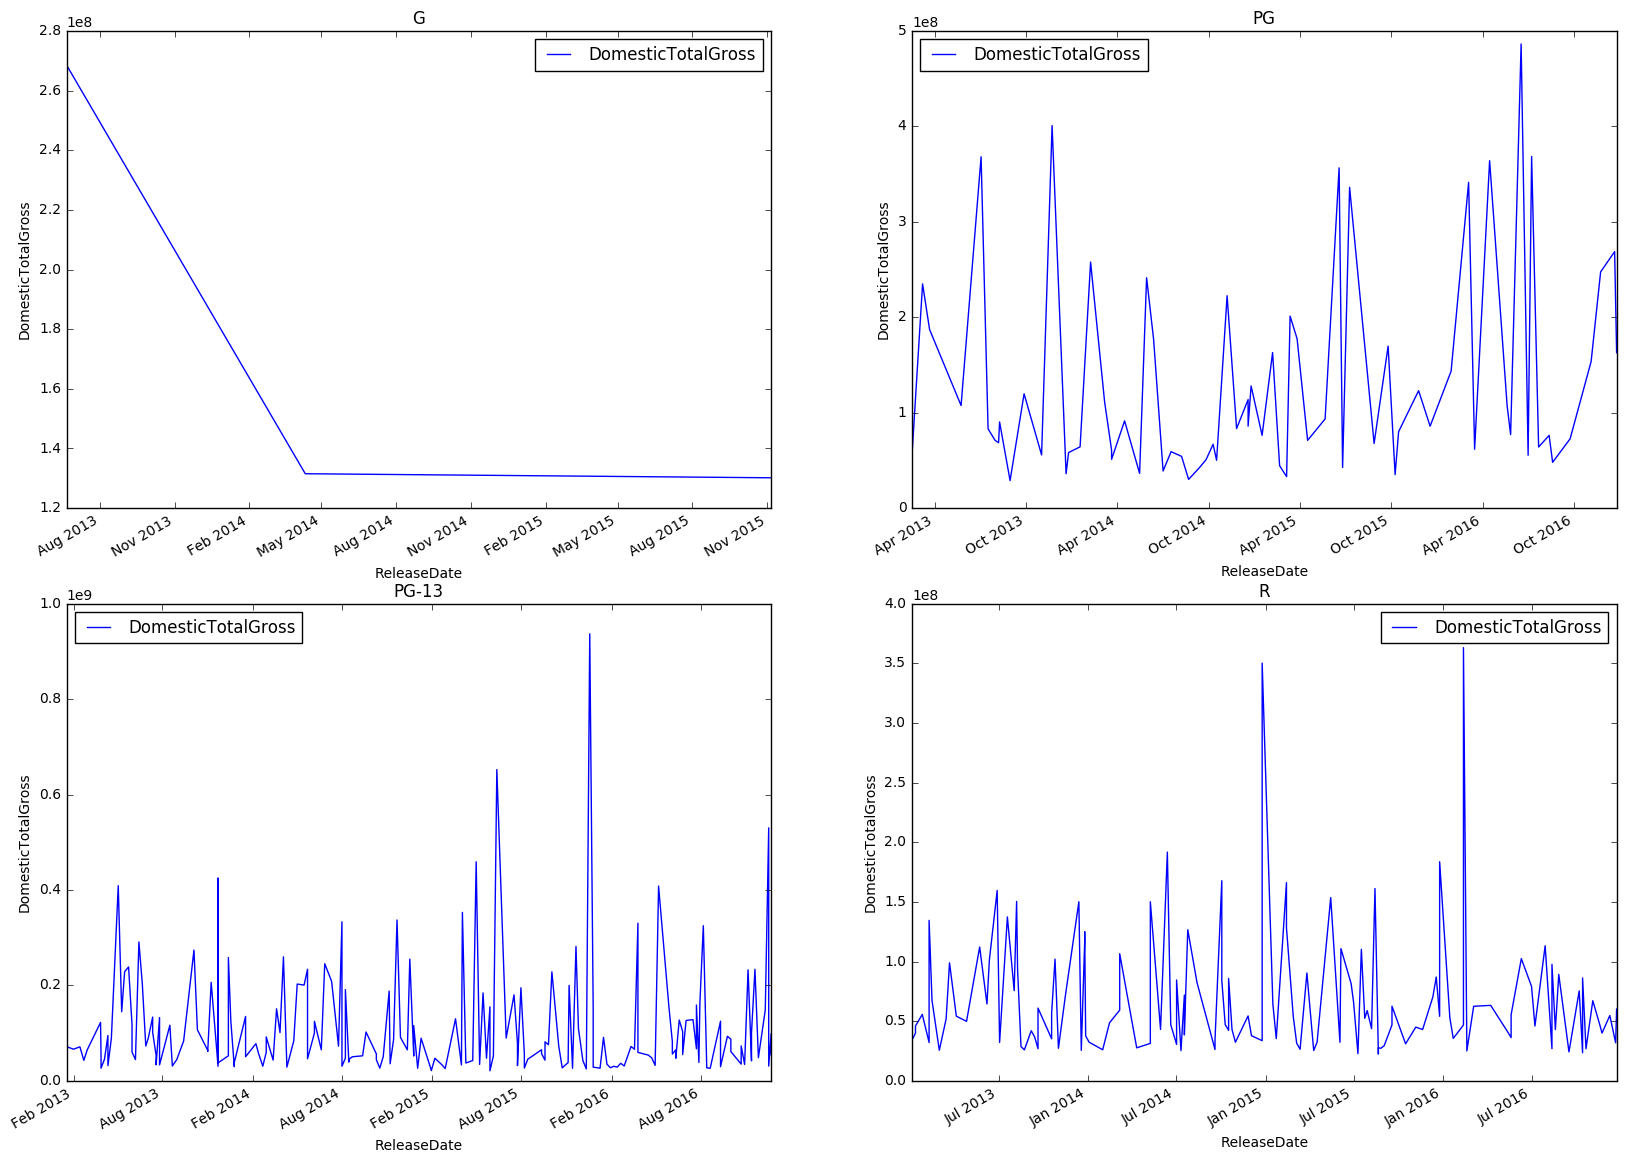

In [188]:
plt.figure(figsize=(20,15))
n=1
for i, group in data.groupby('Rating'):
    ax=plt.subplot(2,2,n)
    group.plot(x='ReleaseDate', y='DomesticTotalGross', title=str(i), ax=ax)
    plt.ylabel('DomesticTotalGross')
    n=n+1

### Exercise 5

Who are the top 5 directors with the highest gross per movie (highest average gross)? How many movies did they release in that time period? Who are the top 5 directors with the highest average gross excluding one-hit wonders (directors that have a single release in the dataset)?

In [201]:
#Who are the top 5 directors with the highest gross per movie (highest average gross)?
top_directors=data.groupby('Director')['DomesticTotalGross'].mean().sort_values(ascending=False).index[:5]

top_directors

Index(['Colin Trevorrow', 'J.J. Abrams', 'Andrew Stanton', 'Joss Whedon',
       'Chris Buck, Jennifer Lee'],
      dtype='object', name='Director')

In [220]:
#How many movies did they release in that time period? 
data[data['Director'].isin(top_directors)]['Director'].value_counts()

J.J. Abrams                 2
Chris Buck, Jennifer Lee    1
Andrew Stanton              1
Colin Trevorrow             1
Joss Whedon                 1
Name: Director, dtype: int64

In [230]:
# Who are the top 5 directors with the highest average gross excluding one-hit wonders 
#without one-hit wonders:
directors_2=data['Director'].value_counts()[data['Director'].value_counts()>2].index
directors_2

Index(['James Wan', 'Antoine Fuqua', 'Ron Howard', 'Malcolm D. Lee',
       'Nick Stoller', 'Robert Schwentke', 'Francis Lawrence', 'Tyler Perry',
       'Jaume Collet-Serra', 'Bryan Singer', 'Peter Berg', 'Paul Feig',
       'Tim Story', 'Denis Villeneuve', 'Michael Bay', 'Shawn Levy',
       'Clint Eastwood'],
      dtype='object')

In [231]:
#top 5 directors with the highest average gross excluding one-hit wonders:
data[data['Director'].isin(directors_2)].groupby('Director')['DomesticTotalGross'].mean().sort_values(ascending=False).index[:5]

Index(['Francis Lawrence', 'Clint Eastwood', 'James Wan', 'Bryan Singer',
       'Paul Feig'],
      dtype='object', name='Director')

### Exercise 6

Group the movies by month of release and plot the mean Domestic Total Gross by month. Calculate the Standard Error and add error bars to the plot. Can you tell any pattern from the data?

In [278]:
import math
data['month']=data['ReleaseDate'].apply(lambda x: x.month)

data_aggr=data.groupby('month')['DomesticTotalGross'].agg({'count':'count', 'std': 'std', 'mean':'mean', 'sem': lambda x: np.std(x, ddof=1)/math.sqrt(len(x))})

data_aggr

,std,count,sem,mean
month,,,,
1,3.275870e+07,25,6551740,53597768
2,7.603271e+07,29,14118919,80094015
3,8.235993e+07,31,14792279,104322230
4,9.641794e+07,24,19681230,89433137
5,1.150581e+08,32,20339589,144845557
6,1.402549e+08,31,25190522,148714648
7,8.335032e+07,45,12425132,103488088
8,7.197976e+07,39,11525985,74280296
9,3.460769e+07,29,6426486,65722319


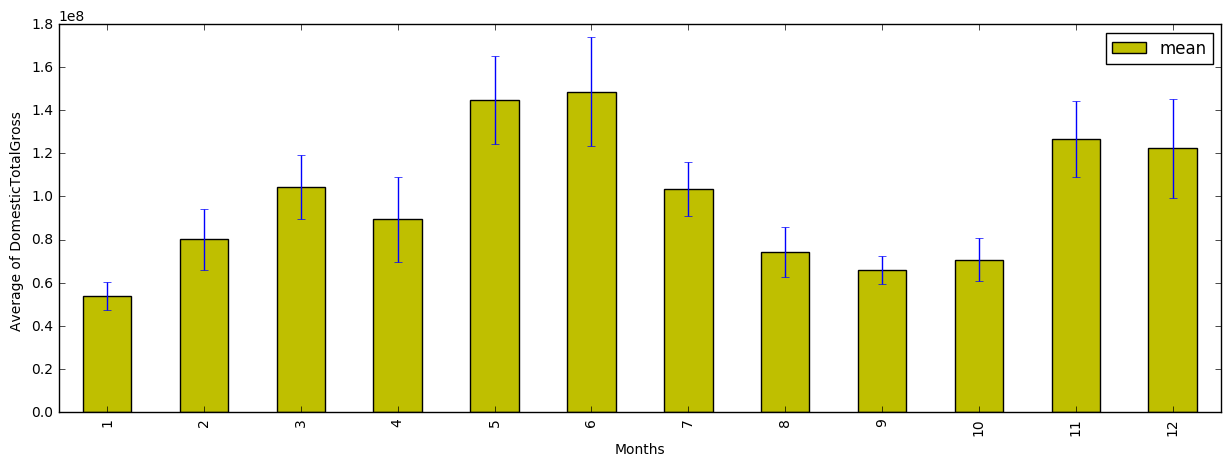

In [279]:
fig=plt.figure(figsize=(15,5))
ax=plt.gca()



data_aggr.plot(y='mean', kind='bar', yerr='sem', ax=ax, color='y' , ecolor='b')
plt.xlabel('Months')
plt.ylabel('Average of DomesticTotalGross ')
plt.show()